## Final Project Submission

Please fill out:
* Student name: Duncan Githaiga
* Student pace: full time hyprid
* Scheduled project review date/time: 
* Instructor name: Madam Maryann Mwikali



# Aviation Accident Database and Synopses
 : Your analysis should yield three concrete business recommendations.
    : Communicating about your work well is extremely important
    : Use plenty of visualizations
    
Aim : Find which aircrafts the lowest risks for rthe company to start this business 

Import necessary libraries

In [1]:
import pandas as pd  

 # for mathematical calculations
import numpy as np         

# for plotting graphs
import matplotlib.pyplot as plt 

# for data visualization
import seaborn as sns

## Data Collection

Import Dataset as CSV file

In [2]:
aviation_dts = pd.read_csv("Aviation_Data.csv", encoding='cp1252')

C:\Users\dunsm\AppData\Local\Temp\ipykernel_1576\3953504441.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_dts = pd.read_csv("AviationData.csv", encoding='cp1252')


In [11]:
aviation_dts.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [10]:
aviation_dts_copy.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [4]:
aviation_dts_copy = aviation_dts.copy()

### Learn / Know our Dataset

In [5]:
aviation_dts_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [9]:
aviation_dts_copy.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [15]:
aviation_dts_copy.shape

(88889, 31)

In [7]:
aviation_dts_copy.duplicated().sum()

0

Get the dataset summary statistics 

In [8]:
aviation_dts_copy.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [12]:
aviation_dts_copy.describe(exclude = 'number')

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,...,88787,81793,32023,12582,82697,16648,84397,61724,82505,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10374,24870,...,2,12,31,3,26,13590,4,12,17074,2924
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


### Data Cleaning and Handling

Missing Values - by dropping the null values for the columns with the highest number butwe will leave the columns we are going to need

In [16]:
aviation_dts_copy.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [30]:
dropcolumns = ['Latitude','Longitude','Airport.Code','Airport.Name','Aircraft.Category','FAR.Description','Schedule','Air.carrier','Broad.phase.of.flight']
aviation_dts_copy_clean = aviation_dts_copy.drop(columns = dropcolumns)
aviation_dts_copy_clean

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,...,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,...,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,...,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN


Drop the columns that we are not going to need

In [34]:
notneeded_columns = ['Accident.Number', 'Country', 'Publication.Date', 'Report.Status','Location']
aviation_df_nan = aviation_dts_copy_clean.drop(columns = notneeded_columns)
aviation_df_nan

,Event.Id,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,1948-10-24,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,20001218X45447,Accident,1962-07-19,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,20061025X01555,Accident,1974-08-30,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,20001218X45448,Accident,1977-06-19,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,20041105X01764,Accident,1979-08-02,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,2022-12-26,Minor,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN
88885,20221227106494,Accident,2022-12-26,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
88886,20221227106497,Accident,2022-12-26,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC
88887,20221227106498,Accident,2022-12-26,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN


Replace Nan values with mean in columns with numerical values

In [41]:
aviation_df = aviation_df_nan.fillna(aviation_df_nan[['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']]
.mean())
aviation_df

,Event.Id,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20001218X45444,Accident,1948-10-24,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.000000,Reciprocating,Personal,2.0,0.000000,0.000000,0.00000,UNK
1,20001218X45447,Accident,1962-07-19,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.000000,Reciprocating,Personal,4.0,0.000000,0.000000,0.00000,UNK
2,20061025X01555,Accident,1974-08-30,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.000000,Reciprocating,Personal,3.0,0.279881,0.357061,5.32544,IMC
3,20001218X45448,Accident,1977-06-19,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.000000,Reciprocating,Personal,2.0,0.000000,0.000000,0.00000,IMC
4,20041105X01764,Accident,1979-08-02,Fatal(1),Destroyed,N15NY,Cessna,501,No,1.146585,NaN,Personal,1.0,2.000000,0.357061,0.00000,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,2022-12-26,Minor,NaN,N1867H,PIPER,PA-28-151,No,1.146585,NaN,Personal,0.0,1.000000,0.000000,0.00000,NaN
88885,20221227106494,Accident,2022-12-26,NaN,NaN,N2895Z,BELLANCA,7ECA,No,1.146585,NaN,NaN,0.0,0.000000,0.000000,0.00000,NaN
88886,20221227106497,Accident,2022-12-26,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.000000,NaN,Personal,0.0,0.000000,0.000000,1.00000,VMC
88887,20221227106498,Accident,2022-12-26,NaN,NaN,N210CU,CESSNA,210N,No,1.146585,NaN,Personal,0.0,0.000000,0.000000,0.00000,NaN


In [44]:
aviation_df[['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].value_counts()


Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries  Total.Uninjured
1.000000           0.0                   0.000000                0.0                   1.00000            16881
                                                                                       2.00000            10606
                   1.0                   0.000000                0.0                   0.00000             4506
                   0.0                   0.000000                1.0                   0.00000             4018
                                         1.000000                0.0                   0.00000             3328
                                                                                                          ...  
1.146585           169.0                 0.279881                10.0                  5.32544                1
                   176.0                 0.000000                0.0                   0.00000                1
 

In [46]:
aviation_df['Model']

0            108-3
1         PA24-180
2             172M
3              112
4              501
           ...    
88884    PA-28-151
88885         7ECA
88886        8GCBC
88887         210N
88888    PA-24-260
Name: Model, Length: 88889, dtype: object

Change the date structure

In [59]:
# Convert 'Event.Date' to datetime format if not already done
aviation_df['Event.Date'] = pd.to_datetime(aviation_df['Event.Date'], format='%Y-%m-%d')

# Extract the year from 'Event.Date'
aviation_df['Year'] = aviation_df['Event.Date'].dt.year

# Display the updated dataframe with only the year
print(aviation_df[['Event.Date', 'Year']].head())

  Event.Date  Year
0 1948-10-24  1948
1 1962-07-19  1962
2 1974-08-30  1974
3 1977-06-19  1977
4 1979-08-02  1979


### Visualisation and Exploratory Data Analysis

Heatmap to show correlation of the relevant columns

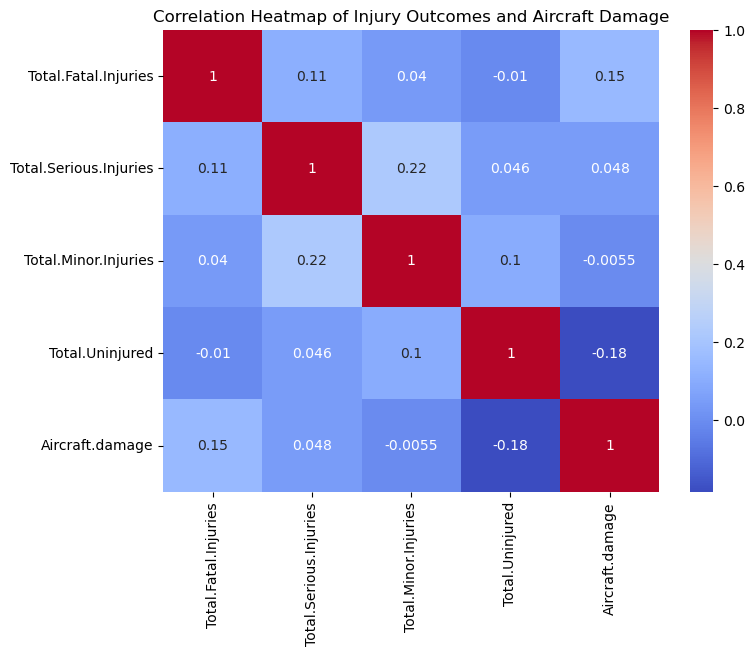

In [47]:
# Select numeric columns relevant to risk analysis
risk_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Aircraft.damage']
# Convert Aircraft.damage to numeric values if needed
aviation_df['Aircraft.damage'] = aviation_df['Aircraft.damage'].map({'None': 0, 'Minor': 1, 'Substantial': 2, 'Destroyed': 3})

# Create correlation matrix
corr = aviation_df[risk_columns].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Injury Outcomes and Aircraft Damage')
plt.show()

Boxplot to show distribution of injuries based on the number of engines

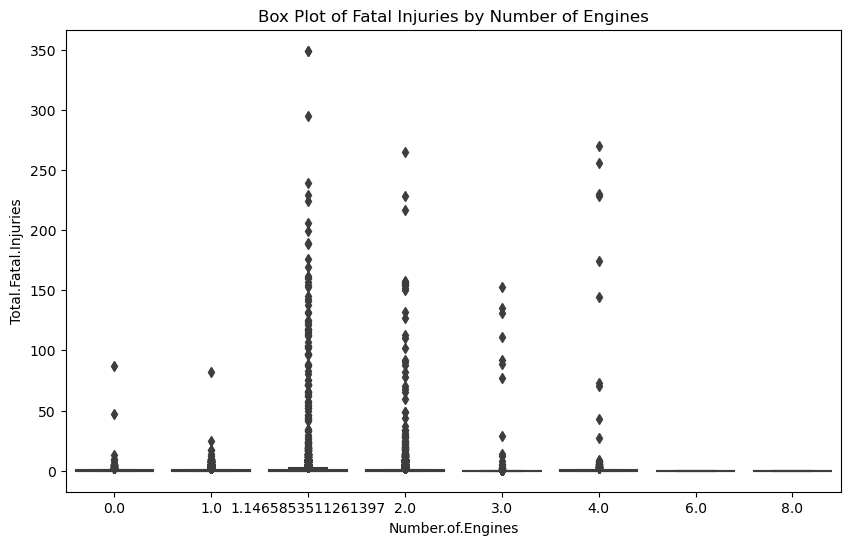

In [49]:
# Box plot to show the spread of injuries across different engine counts
plt.figure(figsize=(10, 6))
sns.boxplot(data=aviation_df, x='Number.of.Engines', y='Total.Fatal.Injuries')
plt.title('Box Plot of Fatal Injuries by Number of Engines')
plt.show()


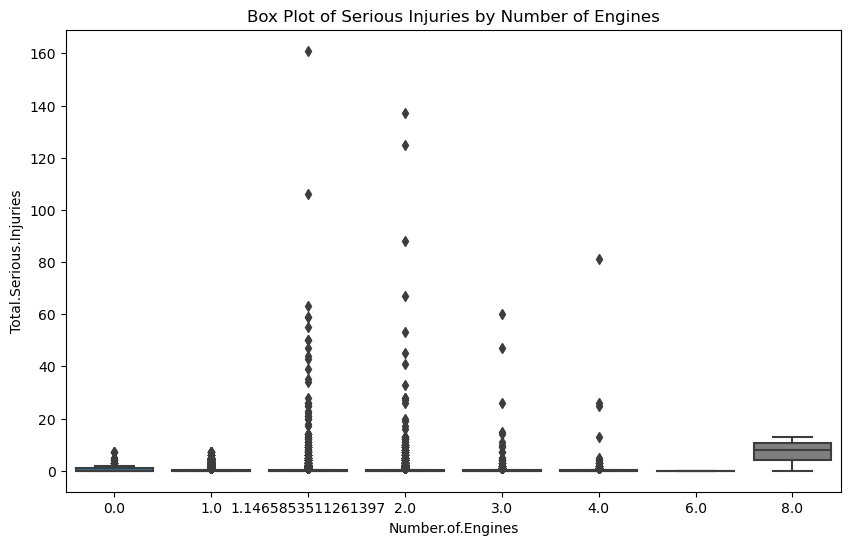

In [50]:
# Similar plot for Total Serious Injuries
plt.figure(figsize=(10, 6))
sns.boxplot(data=aviation_df, x='Number.of.Engines', y='Total.Serious.Injuries')
plt.title('Box Plot of Serious Injuries by Number of Engines')
plt.show()

Stacked Bar Chart
Visualizing the breakdown of injury severity per weather condition:

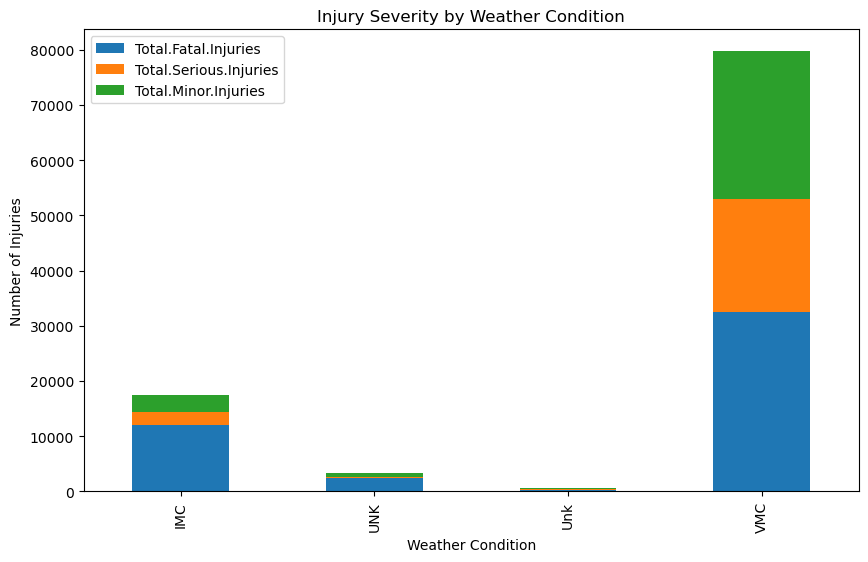

In [51]:
# Group by Weather Condition and sum injury types
weather_injuries = aviation_df.groupby('Weather.Condition')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()

# Plot the stacked bar chart
weather_injuries.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Injury Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Injuries')
plt.show()

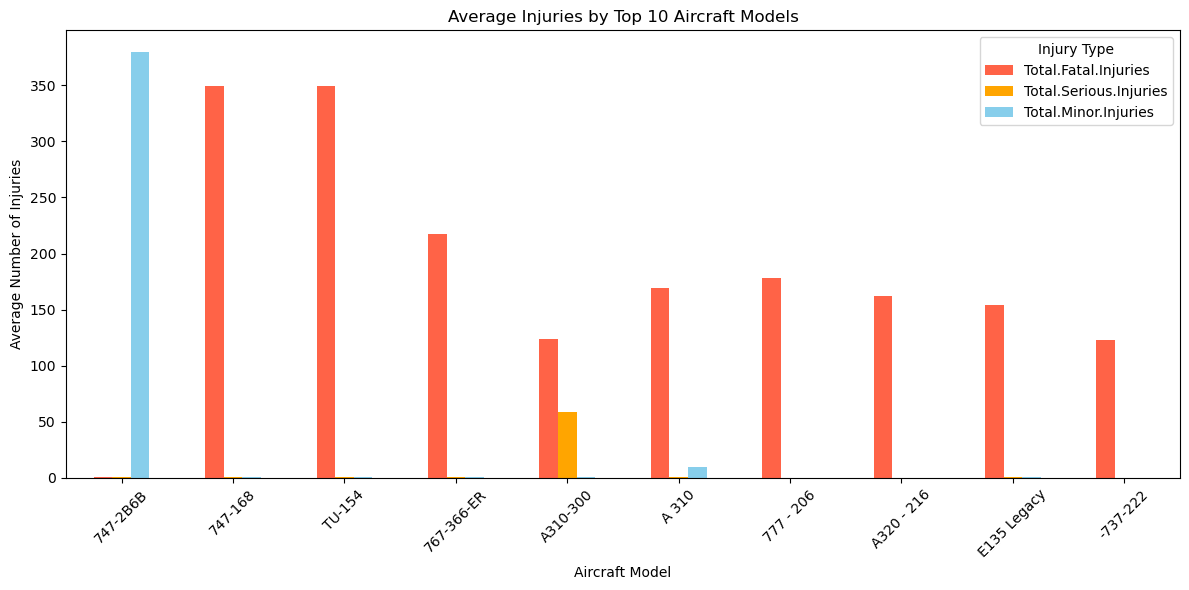

In [63]:
# Group by Aircraft Model (or any other category) and calculate mean injuries
avg_injuries_by_model = aviation_df.groupby('Model')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].mean()

# Calculate total average injuries for sorting
avg_injuries_by_model['Total.Average.Injuries'] = avg_injuries_by_model.sum(axis=1)

# Get the top 10 aircraft models based on total average injuries
top_10_models = avg_injuries_by_model.nlargest(10, 'Total.Average.Injuries')

# Plot a bar chart showing average injuries for the top 10 aircraft models
top_10_models[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].plot(kind='bar', 
                                                                                                 figsize=(12, 6), 
                                                                                                 stacked=False, 
                                                                                                 color=['#FF6347', '#FFA500', '#87CEEB'])

plt.title('Average Injuries by Top 10 Aircraft Models')
plt.xlabel('Aircraft Model')
plt.ylabel('Average Number of Injuries')
plt.xticks(rotation=45)
plt.legend(title='Injury Type')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

Line graph from 1990 for every five years with make of aircraft

C:\Users\dunsm\AppData\Local\Temp\ipykernel_1576\3591814323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_df_filtered['Year.Interval'] = (aviation_df_filtered['Year'] // 5) * 5


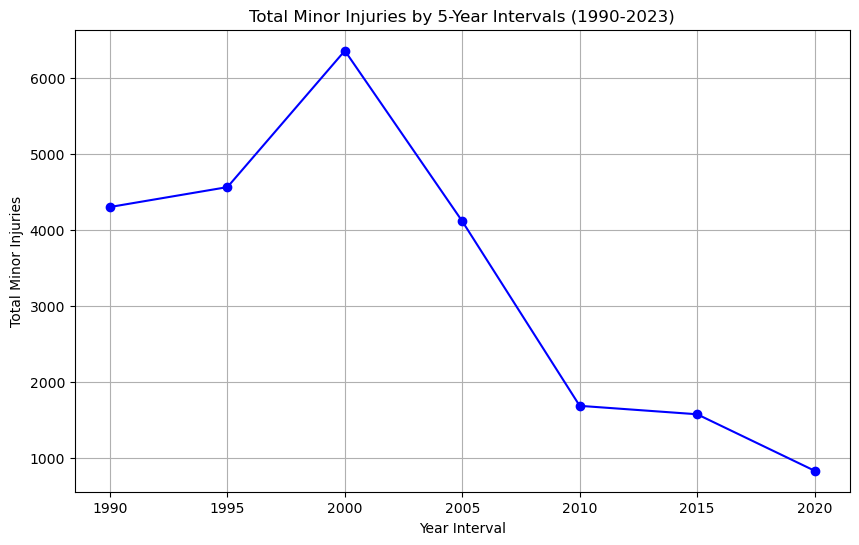

In [61]:
# Filter the data for years between 1990 and 2023
aviation_df_filtered = aviation_df[(aviation_df['Year'] >= 1990) & (aviation_df['Year'] <= 2023)]

# Create a new column for 5-year intervals
aviation_df_filtered['Year.Interval'] = (aviation_df_filtered['Year'] // 5) * 5

# Group by 5-year intervals and sum 'Total.Minor.Injuries'
minor_injuries_by_interval = aviation_df_filtered.groupby('Year.Interval')['Total.Minor.Injuries'].sum()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(minor_injuries_by_interval.index, minor_injuries_by_interval.values, marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('Total Minor Injuries by 5-Year Intervals (1990-2023)')
plt.xlabel('Year Interval')
plt.ylabel('Total Minor Injuries')
plt.grid(True)
plt.xticks(minor_injuries_by_interval.index)

# Show the plot
plt.show()

Scatter Plot
Analyzing the relationship between the number of engines and total injuries:

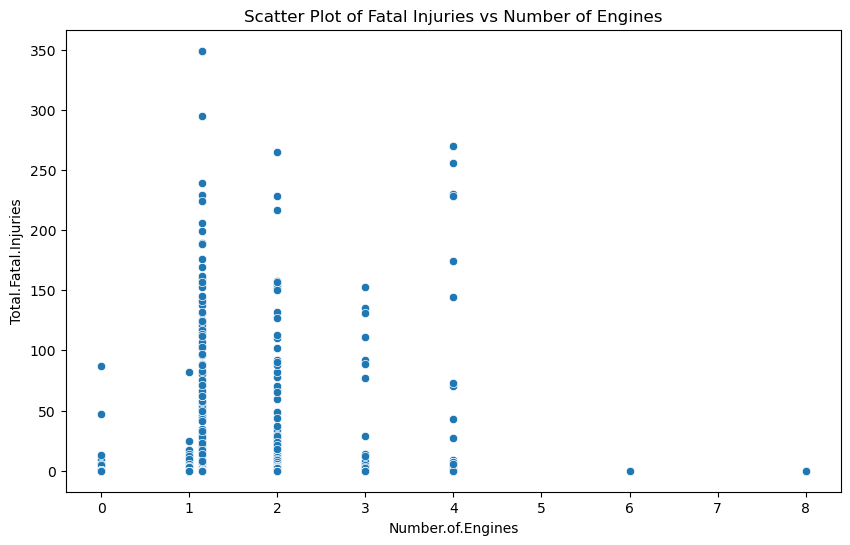

In [53]:
# Scatter plot to show the relationship between Number of Engines and Total Fatal Injuries
plt.figure(figsize=(10, 6))
sns.scatterplot(data=aviation_df, x='Number.of.Engines', y='Total.Fatal.Injuries')
plt.title('Scatter Plot of Fatal Injuries vs Number of Engines')
plt.show()

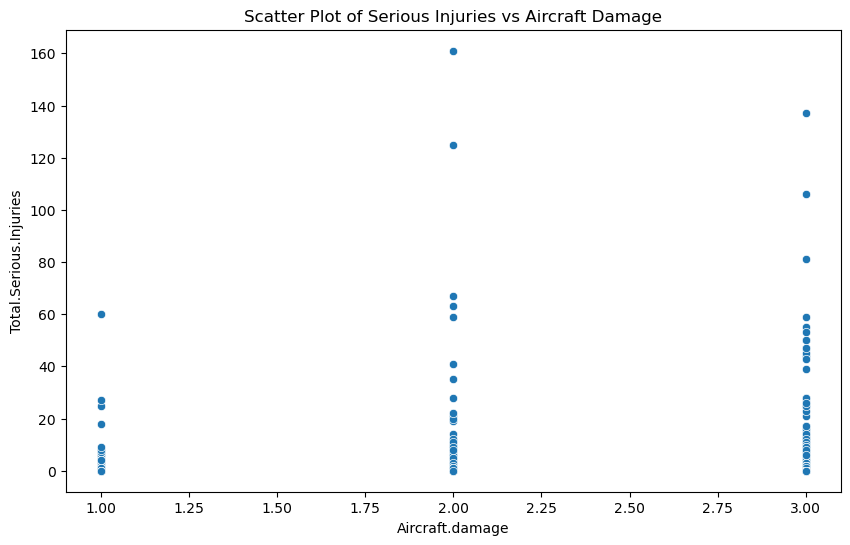

In [54]:
# Scatter plot for Aircraft Damage vs Total Serious Injuries
plt.figure(figsize=(10, 6))
sns.scatterplot(data=aviation_df, x='Aircraft.damage', y='Total.Serious.Injuries')
plt.title('Scatter Plot of Serious Injuries vs Aircraft Damage')
plt.show()

Histograms
Visualizing the distribution of fatal injuries:

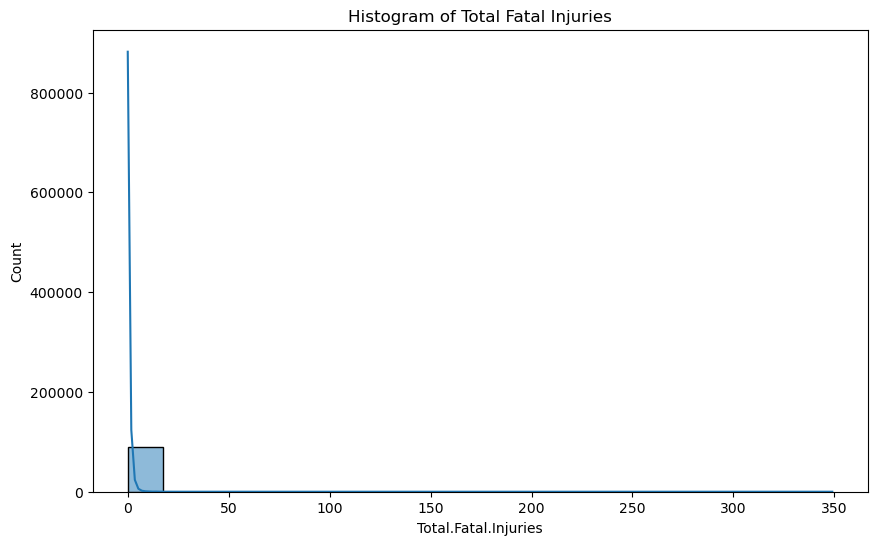

In [56]:
# Histogram for Total Fatal Injuries
plt.figure(figsize=(10, 6))
sns.histplot(data=aviation_df, x='Total.Fatal.Injuries', bins=20, kde=True)
plt.title('Histogram of Total Fatal Injuries')
plt.show()

Pair Plot (Multivariate Analysis)
Exploring relationships between multiple variables:

C:\Users\dunsm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


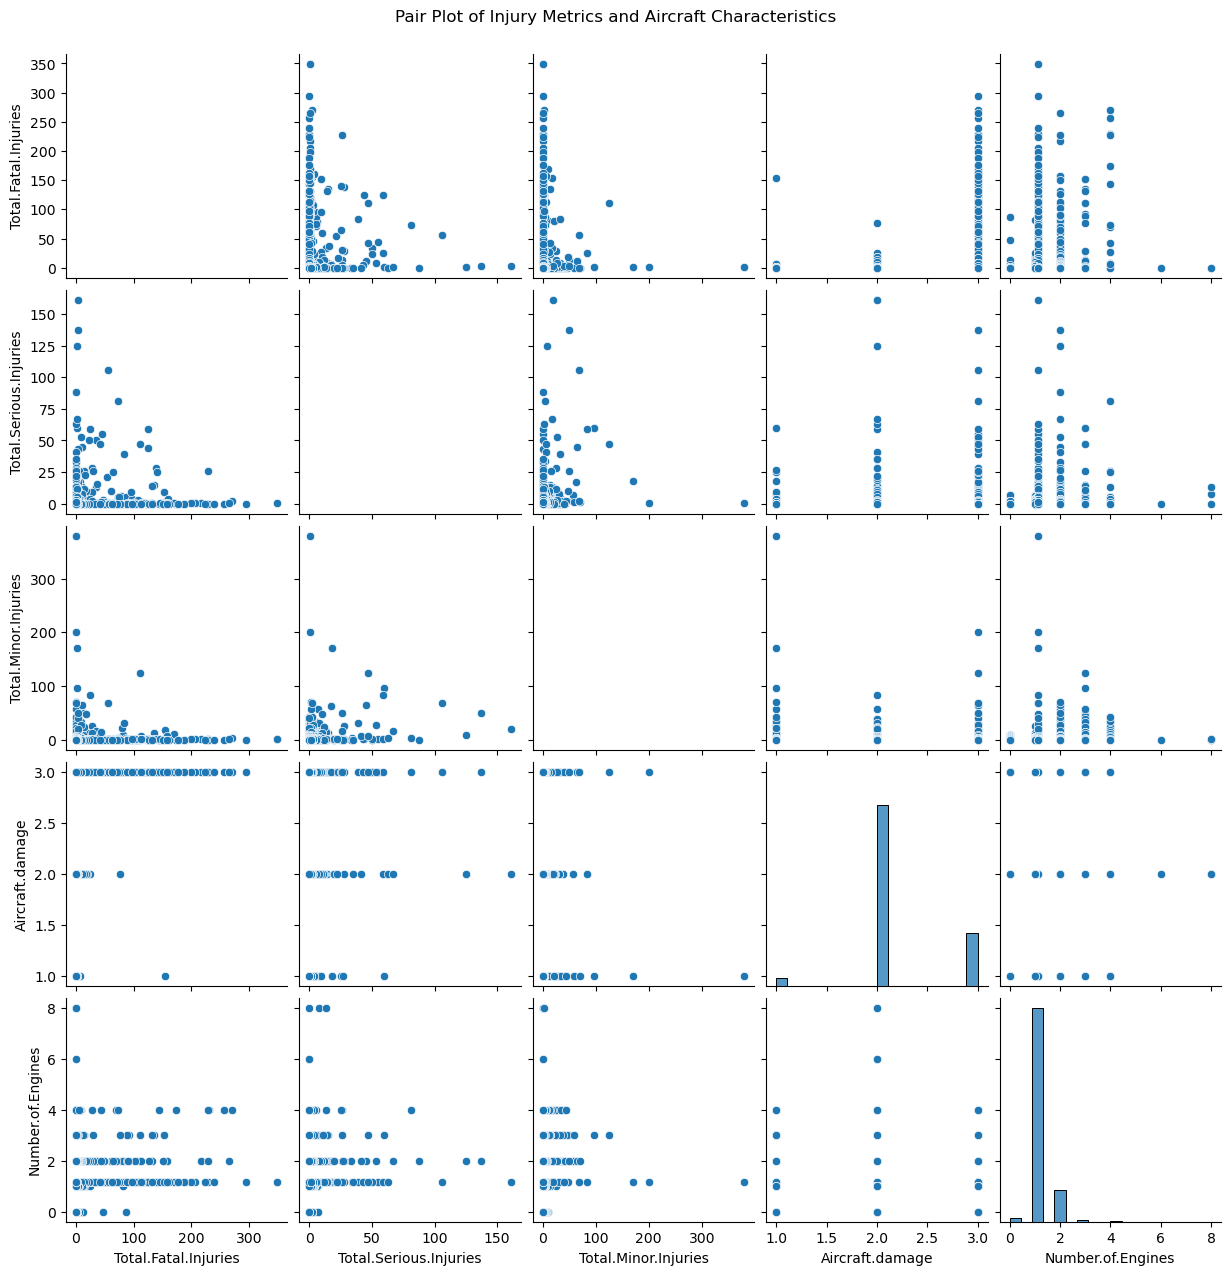

In [57]:
# Use pairplot to explore relationships between different injury-related columns
sns.pairplot(aviation_df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Aircraft.damage', 'Number.of.Engines']])
plt.suptitle('Pair Plot of Injury Metrics and Aircraft Characteristics', y=1.02)
plt.show()